# Problem Statement

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

Metric
Submissions are evaluated on Mean-Squared-Error (MSE).
Submission File Format
The file should contain a header and have the following format:

    Id,SalePrice
    1461,169000.1
    1462,187724.1233

# Read Data Set

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import pandas as pd

In [3]:
A = pd.read_csv("c:/Users/jagdi/Downloads/training_set.csv")
B = pd.read_csv("c:/Users/jagdi/Downloads/testing_set.csv")

In [4]:
A.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Missing Data Treatment

In [5]:
A.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [6]:
A.Alley = A.Alley.fillna("N0_Alley_Access")
A.BsmtQual = A.BsmtQual.fillna("No_Basement")
A.BsmtExposure = A.BsmtExposure.fillna("No_Basement")
A.BsmtCond = A.BsmtCond.fillna("No_Basement")
A.BsmtFinType1 = A.BsmtFinType1.fillna("No_Basement")
A.BsmtFinType2 = A.BsmtFinType2.fillna("No_Basement")
A.FireplaceQu = A.FireplaceQu.fillna("No_Fireplace")
A.GarageType = A.GarageType.fillna("No_Garage")
A.GarageFinish = A.GarageFinish.fillna("No_Garage")
A.GarageQual = A.GarageQual.fillna("No_Garage")
A.GarageCond = A.GarageCond.fillna("No_Garage")
A.PoolQC = A.PoolQC.fillna("No_Pool")
A.Fence = A.Fence.fillna("No_Fence")
A.MiscFeature = A.MiscFeature.fillna("None")

In [7]:
B.Alley = B.Alley.fillna("No_Alley_Access")
B.BsmtQual = B.BsmtQual.fillna("No_Basement")
B.BsmtExposure = B.BsmtExposure.fillna("No_Basement")
B.BsmtCond = B.BsmtCond.fillna("No_Basement")
B.BsmtFinType1 = B.BsmtFinType1.fillna("No_Basement")
B.BsmtFinType2 = B.BsmtFinType2.fillna("No_Basement")
B.FireplaceQu = B.FireplaceQu.fillna("No_Fireplace")
B.GarageType = B.GarageType.fillna("No_Garage")
B.GarageFinish = B.GarageFinish.fillna("No_Garage")
B.GarageQual = B.GarageQual.fillna("No_Garage")
B.GarageCond = B.GarageCond.fillna("No_Garage")
B.PoolQC = B.PoolQC.fillna("No_Pool")
B.Fence = B.Fence.fillna("No_Fence")
B.MiscFeature = B.MiscFeature.fillna("None")

In [8]:
A.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [9]:
cat = []
con = []
for i in A.columns:
    if(A[i].dtypes == "object"):
        cat.append(i)
        x = A[i].mode()[0]
        A[i] = A[i].fillna(x)
    else:
        con.append(i)
        x = A[i].mean()
        A[i] = A[i].fillna(x)

In [10]:
A.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

# Initial X and Y

In [11]:
Y = A[["SalePrice"]]
X = A.drop(labels=["Id","SalePrice"],axis=1)

In [12]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

# Check Skew And remove Sew

In [13]:
A.skew()

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.384950
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.676412
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.668175
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

In [14]:
C = X[con].skew().sort_values()


In [15]:
skew_cols = C[C>2].index

In [16]:
X[skew_cols].skew()

OpenPorchSF       2.364342
LotFrontage       2.384950
MasVnrArea        2.676412
EnclosedPorch     3.089872
BsmtHalfBath      4.103403
ScreenPorch       4.122214
BsmtFinSF2        4.255261
KitchenAbvGr      4.488397
LowQualFinSF      9.011341
3SsnPorch        10.304342
LotArea          12.207688
PoolArea         14.828374
MiscVal          24.476794
dtype: float64

In [17]:
import numpy as np
for j in skew_cols:
    w = []
    for i in X[j]:
        if(i == 0):
            w.append(0)
        else:
            w.append(round(np.log(i),3))
    X[j]=w

In [18]:
X[skew_cols].skew().sort_values()

LotFrontage      -0.929337
LotArea          -0.137789
OpenPorchSF      -0.016330
MasVnrArea        0.483248
EnclosedPorch     2.113838
BsmtFinSF2        2.524778
ScreenPorch       3.150993
KitchenAbvGr      4.441520
MiscVal           5.171262
LowQualFinSF      7.462317
3SsnPorch         7.737547
PoolArea         14.363146
BsmtHalfBath     26.990701
dtype: float64

In [19]:
SD = X[skew_cols].skew().sort_values().index[4:13]

In [20]:
X = X.drop(labels=SD,axis=1)

In [21]:
X.skew()

MSSubClass      1.407657
LotFrontage    -0.929337
LotArea        -0.137789
OverallQual     0.216944
OverallCond     0.693067
YearBuilt      -0.613461
YearRemodAdd   -0.503562
MasVnrArea      0.483248
BsmtFinSF1      1.685503
BsmtUnfSF       0.920268
TotalBsmtSF     1.524255
1stFlrSF        1.376757
2ndFlrSF        0.813030
GrLivArea       1.366560
BsmtFullBath    0.596067
FullBath        0.036562
HalfBath        0.675897
BedroomAbvGr    0.211790
TotRmsAbvGrd    0.676341
Fireplaces      0.649565
GarageYrBlt    -0.668175
GarageCars     -0.342549
GarageArea      0.179981
WoodDeckSF      1.541376
OpenPorchSF    -0.016330
MoSold          0.212053
YrSold          0.096269
dtype: float64

In [22]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

# Check For ANOVA

In [23]:
for i in cat:
    import pandas as pd
    from statsmodels.formula.api import ols
    rel = "SalePrice ~ " + str(i)
    model = ols(rel,A).fit()
    from statsmodels.stats.anova import anova_lm
    anova_result = anova_lm(model)
    print(rel,"----> ",round(anova_result.iloc[0,4],4))

SalePrice ~ MSZoning ---->  0.0
SalePrice ~ Street ---->  0.117
SalePrice ~ Alley ---->  0.0
SalePrice ~ LotShape ---->  0.0
SalePrice ~ LandContour ---->  0.0
SalePrice ~ Utilities ---->  0.5847
SalePrice ~ LotConfig ---->  0.0
SalePrice ~ LandSlope ---->  0.1414
SalePrice ~ Neighborhood ---->  0.0
SalePrice ~ Condition1 ---->  0.0
SalePrice ~ Condition2 ---->  0.0434
SalePrice ~ BldgType ---->  0.0
SalePrice ~ HouseStyle ---->  0.0
SalePrice ~ RoofStyle ---->  0.0
SalePrice ~ RoofMatl ---->  0.0
SalePrice ~ Exterior1st ---->  0.0
SalePrice ~ Exterior2nd ---->  0.0
SalePrice ~ MasVnrType ---->  0.0
SalePrice ~ ExterQual ---->  0.0
SalePrice ~ ExterCond ---->  0.0
SalePrice ~ Foundation ---->  0.0
SalePrice ~ BsmtQual ---->  0.0
SalePrice ~ BsmtCond ---->  0.0
SalePrice ~ BsmtExposure ---->  0.0
SalePrice ~ BsmtFinType1 ---->  0.0
SalePrice ~ BsmtFinType2 ---->  0.0
SalePrice ~ Heating ---->  0.0008
SalePrice ~ HeatingQC ---->  0.0
SalePrice ~ CentralAir ---->  0.0
SalePrice ~ Electric

In [24]:
cat.remove("Street")
cat.remove("Utilities")
cat.remove("LandSlope")

In [25]:
A.corr()["SalePrice"].sort_values().index[0:13]


Index(['KitchenAbvGr', 'EnclosedPorch', 'MSSubClass', 'OverallCond', 'YrSold',
       'LowQualFinSF', 'Id', 'MiscVal', 'BsmtHalfBath', 'BsmtFinSF2',
       '3SsnPorch', 'MoSold', 'PoolArea'],
      dtype='object')

In [26]:
u = ['MSSubClass', 'OverallCond', 'YrSold']
    
for i in u:
    con.remove(i)

# Satndardize Data

In [27]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
X2 = pd.get_dummies(X[cat])

In [28]:
Xnew = X1.join(X2)

# Remove Outliers

In [29]:
outliers = []
for i in Xnew:
    outliers.extend(Xnew[i][(Xnew[i] > 3) | (Xnew[i] < -3)].index)

In [30]:
from numpy import unique
outliers = unique(outliers)

In [31]:
Xnew = Xnew.drop(index=outliers,axis=0)
Y = Y.drop(index=outliers,axis=0)

In [32]:
X.index

RangeIndex(start=0, stop=1460, step=1)

In [33]:
Xnew.shape

(1305, 283)

In [34]:
Y.shape

(1305, 1)

# Split data 

In [35]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

# Backward Elemination Model

In [36]:
from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     59.52
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               0.00
Time:                        17:51:42   Log-Likelihood:                -11646.
No. Observations:                1044   AIC:                         2.373e+04
Df Residuals:                     825   BIC:                         2.481e+04
Df Model:                         218                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                     1.997e+04   2655.215      7.523      0.000    1.48e+04    2.52e+04
LotFrontage                 14.8038   1178.478      0.013      0.990   -2298.364    2327.972
LotArea                   7319.5801   1568.302      4.667      0.000    4241.248    1.04e+04
OverallQual               8524.3556   1455.847      5.855      0.000    5666.756    1.14e+04
YearBuilt                 8903.7159   2444.555      3.642      0.000    4105.437    1.37e+04
YearRemodAdd              5363.0698   1098.723      4.881      0.000    3206.449    7519.691
MasVnrArea                -771.5310   2757.448     -0.280      0.780   -6183.969    4640.907
BsmtFinSF1                5198.5618   3715.386      1.399      0.162   -2094.159    1.25e+04
BsmtUnfSF                -1582.0756   3654.388     -0.433      0.665   -8755.067    5590.916
TotalBsmtSF               1.037e+04   4066.428      2.551      0.011    2391.188    1.84e+04
1stFlrSF                 -1826.3735   8048.610     -0.227      0.821   -1.76e+04     1.4e+04
2ndFlrSF                  5702.5534   8469.750      0.673      0.501   -1.09e+04    2.23e+04
GrLivArea                 2.574e+04   1.08e+04      2.392      0.017    4615.073    4.69e+04
BsmtFullBath               159.4864   1006.425      0.158      0.874   -1815.969    2134.942
FullBath                   585.7862   1310.375      0.447      0.655   -1986.275    3157.847
HalfBath                  1015.6077   1162.892      0.873      0.383   -1266.968    3298.183
BedroomAbvGr              -470.4959   1197.099     -0.393      0.694   -2820.214    1879.222
TotRmsAbvGrd               297.6520   1572.000      0.189      0.850   -2787.938    3383.242
Fireplaces                3041.8539   1850.023      1.644      0.101    -589.452    6673.160
GarageYrBlt              -2826.7415   1550.852     -1.823      0.069   -5870.822     217.339
GarageCars                1400.0872   1828.824      0.766      0.444   -2189.609    4989.783
GarageArea                5661.4844   1784.868      3.172      0.002    2158.068    9164.901
WoodDeckSF                2058.3794    832.150      2.474      0.014     424.999    3691.760
OpenPorchSF                831.3459    822.361      1.011      0.312    -782.820    2445.512
MoSold                    -138.5737    676.516     -0.205      0.838   -1466.468    1189.321
MSZoning_C (all)         -2.018e+04   9017.825     -2.238      0.025   -3.79e+04   -2483.661
MSZoning_FV                1.87e+04   6085.432      3.073      0.002    6755.017    3.06e+04
MSZoning_RH               9504.5653   5714.908      1.663      0.097   -1712.904    2.07e+04
MSZoning_RL               6174.2069   3271.870      1.887      0.060    -247.963    1.26e+04
MSZoning_RM               5779.9687   3628.602      1.593      0.112   -1342.411    1.29e+04
Alley_Grvl    

In [37]:
model.rsquared_adj

0.9244214853845198

In [38]:
model.pvalues.sort_values().index[-1]

'MiscFeature_TenC'

In [39]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9244

In [40]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9244

In [41]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9244

In [42]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9245

In [43]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9245

In [44]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9245

In [45]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9246

In [46]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9246

In [47]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9247

In [48]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9247

In [49]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9248

In [50]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9248

In [51]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9248

In [52]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9248

In [53]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9248

In [54]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9248

In [55]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9249

In [56]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9249

In [57]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9249

In [58]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9249

In [59]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9249

In [60]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9249

In [61]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.925

In [62]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.925

In [63]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.925

In [64]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.925

In [65]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9251

In [66]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9251

In [67]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9251

In [68]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9251

In [69]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9251

In [70]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9252

In [71]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9253

In [72]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9253

In [73]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9254

In [74]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9255

In [75]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9256

In [76]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9257

In [77]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9257

In [78]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9257

In [79]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9257

In [80]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9258

In [81]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9258

In [82]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9258

In [83]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9258

In [84]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9259

In [85]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9259

In [86]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.926

In [87]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.926

In [88]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.926

In [89]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.926

In [90]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.926

In [91]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9261

In [92]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9262

In [93]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9262

In [94]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9263

In [95]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9264

In [96]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9264

In [97]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9265

In [98]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9265

In [99]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9266

In [100]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9267

In [101]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9268

In [102]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9268

In [103]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9269

In [104]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.927

In [105]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.927

In [106]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9271

In [107]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9272

In [108]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9272

In [109]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9272

In [110]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9273

In [111]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9274

In [112]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9275

In [113]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9275

In [114]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9276

In [115]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9276

In [116]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9277

In [117]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9278

In [118]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9278

In [119]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9279

In [120]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9279

In [121]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.928

In [122]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.928

In [123]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.928

In [124]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9281

In [125]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9282

In [126]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9282

In [127]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9282

In [128]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9283

In [129]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9284

In [130]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9284

In [131]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9284

In [132]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9285

In [133]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9286

In [134]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9286

In [135]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9286

In [136]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9286

In [137]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9287

In [138]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9288

In [139]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9288

In [140]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9289

In [141]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9289

In [142]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.929

In [143]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.929

In [144]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9291

In [145]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9292

In [146]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9292

In [147]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9293

In [148]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9293

In [149]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9294

In [150]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9294

In [151]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9295

In [152]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9295

In [153]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9296

In [154]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9296

In [155]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9296

In [156]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9297

In [157]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9297

In [158]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9297

In [159]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9298

In [160]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9298

In [161]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9298

In [162]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9299

In [163]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9299

In [164]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.93

In [165]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.93

In [166]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.93

In [167]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9301

In [168]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9301

In [169]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9302

In [170]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9302

In [171]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9302

In [172]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9303

In [173]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9303

In [174]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9303

In [175]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9303

In [176]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9304

In [177]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9304

In [178]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9304

In [179]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9304

In [180]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9304

In [181]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9304

In [182]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9304

In [183]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9304

In [184]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9305

In [185]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9305

In [186]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9306

In [187]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9306

In [188]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9306

In [189]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9306

In [190]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9306

In [191]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9306

In [192]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9306

In [193]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9305

In [194]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9305

In [195]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9305

In [196]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9305

In [197]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9305

In [198]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9305

In [199]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9304

In [200]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9304

In [201]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9304

In [202]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9304

In [203]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9304

In [204]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9304

In [205]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9304

In [206]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9305

In [207]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9305

In [208]:
CD = model.pvalues.sort_values().index[-1]

Xnew = Xnew.drop(labels=CD,axis=1)
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=31)

from statsmodels.api import OLS,add_constant
xconst = add_constant(xtrain)
ols = OLS(ytrain,xconst)
model = ols.fit()
round(model.rsquared_adj,4)

0.9305

In [209]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
model = lm.fit(xtrain,ytrain)
tr_pred = model.predict(xtrain) 
ts_pred = model.predict(xtest)

from sklearn.metrics import mean_squared_error
tr_err = round(mean_squared_error(ytrain,tr_pred),2)
ts_err = round(mean_squared_error(ytest,ts_pred),2)

In [210]:
tr_err

301098273.83

In [211]:
ts_err

4.38156652044988e+28

In [212]:
# Model is Overfit

# Regularize

In [213]:
w = []
q = 0.1
for i in range(0,1000,1):
    q = q+0.01
    q = round(q,4)
    w.append(q)
    
tr = []
ts = []
for i in w:
    from sklearn.linear_model import Ridge
    ls = Ridge(alpha = i)
    model = ls.fit(xtrain,ytrain)
    
    pred_tr = model.predict(xtrain)
    tr_err = round(mean_squared_error(ytrain,pred_tr),2)
    
    pred_ts = model.predict(xtest)
    ts_err = round(mean_squared_error(ytest,pred_ts),2)
    
    tr.append(tr_err)
    ts.append(ts_err)

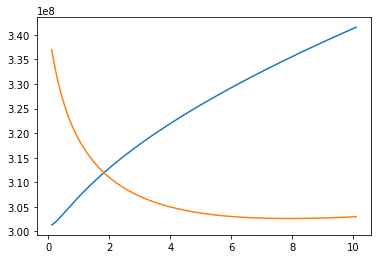

In [214]:
import matplotlib.pyplot as plt
plt.plot(w,tr)
plt.plot(w,ts)

In [215]:
w = []
q = 0.01
for i in range(0,1000,1):
    q = q + 0.01
    q = round(q,2)
    w.append(q)

In [216]:
for i in w:
    from sklearn.linear_model import Ridge
    rr = Ridge(alpha = i)
    model = rr.fit(xtrain,ytrain)

    pred_tr = model.predict(xtrain)
    tr_err = round(mean_squared_error(ytrain,pred_tr),2)

    pred_ts = model.predict(xtest)
    ts_err = round(mean_squared_error(ytest,pred_ts),2)

    print("==========",i,"===========")
    print(tr_err)
    print(ts_err)
    print(tr_err - ts_err)

========== 0.02 ===========
301106828.41
340736621.34
-39629792.92999995
========== 0.03 ===========
301117705.91
340277996.48
-39160290.56999999
========== 0.04 ===========
301132464.61
339829618.0
-38697153.389999986
========== 0.05 ===========
301150860.06
339391119.91
-38240259.850000024
========== 0.06 ===========
301172663.94
338962153.82
-37789489.879999995
========== 0.07 ===========
301197662.93
338542388.0
-37344725.06999999
========== 0.08 ===========
301225657.52
338131506.31
-36905848.79000002
========== 0.09 ===========
301256461.09
337729207.32
-36472746.23000002
========== 0.1 ===========
301289898.97
337335203.48
-36045304.50999999
========== 0.11 ===========
301325807.54
336949220.27
-35623412.72999996
========== 0.12 ===========
301364033.52
336570995.55
-35206962.03000003
========== 0.13 ===========
301404433.2
336200278.78
-34795845.57999998
========== 0.14 ===========
301446871.81
335836830.43
-34389958.620000005
========== 0.15 ===========
301491222.88
335480421.

========== 1.22 ===========
308460845.43
316389968.72
-7929123.290000021
========== 1.23 ===========
308522874.42
316297413.33
-7774538.909999967
========== 1.24 ===========
308584759.66
316205655.88
-7620896.219999969
========== 1.25 ===========
308646501.56
316114686.0
-7468184.439999998
========== 1.26 ===========
308708100.51
316024493.51
-7316393.0
========== 1.27 ===========
308769556.95
315935068.41
-7165511.460000038
========== 1.28 ===========
308830871.33
315846400.9
-7015529.569999993
========== 1.29 ===========
308892044.09
315758481.33
-6866437.24000001
========== 1.3 ===========
308953075.71
315671300.26
-6718224.550000012
========== 1.31 ===========
309013966.69
315584848.38
-6570881.689999998
========== 1.32 ===========
309074717.5
315499116.57
-6424399.069999993
========== 1.33 ===========
309135328.67
315414095.88
-6278767.209999979
========== 1.34 ===========
309195800.71
315329777.49
-6133976.780000031
========== 1.35 ===========
309256134.16
315246152.77
-5990018.6

========== 2.39 ===========
314888593.27
309201729.51
5686863.75999999
========== 2.4 ===========
314937615.28
309161641.36
5775973.919999957
========== 2.41 ===========
314986556.69
309121798.41
5864758.279999971
========== 2.42 ===========
315035417.91
309082198.74
5953219.170000017
========== 2.43 ===========
315084199.34
309042840.43
6041358.909999967
========== 2.44 ===========
315132901.37
309003721.58
6129179.790000021
========== 2.45 ===========
315181524.41
308964840.32
6216684.090000033
========== 2.46 ===========
315230068.86
308926194.81
6303874.050000012
========== 2.47 ===========
315278535.1
308887783.22
6390751.879999995
========== 2.48 ===========
315326923.52
308849603.73
6477319.789999962
========== 2.49 ===========
315375234.52
308811654.56
6563579.959999979
========== 2.5 ===========
315423468.47
308773933.93
6649534.540000021
========== 2.51 ===========
315471625.75
308736440.09
6735185.660000026
========== 2.52 ===========
315519706.75
308699171.31
6820535.439999

========== 3.54 ===========
320081084.6
305833998.8
14247085.800000012
========== 3.55 ===========
320122917.26
305813201.49
14309715.76999998
========== 3.56 ===========
320164701.58
305792517.04
14372184.539999962
========== 3.57 ===========
320206437.74
305771944.81
14434492.930000007
========== 3.58 ===========
320248125.94
305751484.14
14496641.800000012
========== 3.59 ===========
320289766.34
305731134.38
14558631.959999979
========== 3.6 ===========
320331359.15
305710894.91
14620464.23999995
========== 3.61 ===========
320372904.53
305690765.09
14682139.439999998
========== 3.62 ===========
320414402.67
305670744.3
14743658.370000005
========== 3.63 ===========
320455853.74
305650831.9
14805021.840000033
========== 3.64 ===========
320497257.94
305631027.29
14866230.649999976
========== 3.65 ===========
320538615.42
305611329.85
14927285.569999993
========== 3.66 ===========
320579926.37
305591738.98
14988187.389999986
========== 3.67 ===========
320621190.97
305572254.06
1504

========== 4.72 ===========
324725809.28
304017169.01
20708640.26999998
========== 4.73 ===========
324762972.05
304006254.55
20756717.5
========== 4.74 ===========
324800102.39
303995401.42
20804700.96999997
========== 4.75 ===========
324837200.41
303984609.33
20852591.080000043
========== 4.76 ===========
324874266.2
303973878.02
20900388.180000007
========== 4.77 ===========
324911299.84
303963207.19
20948092.649999976
========== 4.78 ===========
324948301.45
303952596.57
20995704.879999995
========== 4.79 ===========
324985271.11
303942045.89
21043225.22000003
========== 4.8 ===========
325022208.91
303931554.86
21090654.050000012
========== 4.81 ===========
325059114.95
303921123.22
21137991.72999996
========== 4.82 ===========
325095989.32
303910750.69
21185238.629999995
========== 4.83 ===========
325132832.11
303900437.01
21232395.100000024
========== 4.84 ===========
325169643.42
303890181.9
21279461.52000004
========== 4.85 ===========
325206423.34
303879985.1
21326438.23999

========== 5.88 ===========
328841785.77
303099096.18
25742689.589999974
========== 5.89 ===========
328875726.07
303093771.35
25781954.71999997
========== 5.9 ===========
328909642.54
303088483.98
25821158.560000002
========== 5.91 ===========
328943535.26
303083233.91
25860301.349999964
========== 5.92 ===========
328977404.28
303078021.01
25899383.26999998
========== 5.93 ===========
329011249.65
303072845.12
25938404.52999997
========== 5.94 ===========
329045071.43
303067706.11
25977365.319999993
========== 5.95 ===========
329078869.68
303062603.82
26016265.860000014
========== 5.96 ===========
329112644.45
303057538.13
26055106.319999993
========== 5.97 ===========
329146395.79
303052508.87
26093886.920000017
========== 5.98 ===========
329180123.76
303047515.92
26132607.839999974
========== 5.99 ===========
329213828.43
303042559.14
26171269.29000002
========== 6.0 ===========
329247509.83
303037638.37
26209871.45999998
========== 6.01 ===========
329281168.03
303032753.49
2624

========== 7.06 ===========
332695899.71
302695291.08
30000608.629999995
========== 7.07 ===========
332727367.94
302693545.12
30033822.819999993
========== 7.08 ===========
332758817.73
302691823.49
30066994.24000001
========== 7.09 ===========
332790249.12
302690126.1
30100123.01999998
========== 7.1 ===========
332821662.15
302688452.88
30133209.26999998
========== 7.11 ===========
332853056.86
302686803.73
30166253.129999995
========== 7.12 ===========
332884433.27
302685178.59
30199254.680000007
========== 7.13 ===========
332915791.42
302683577.37
30232214.050000012
========== 7.14 ===========
332947131.36
302681999.98
30265131.379999995
========== 7.15 ===========
332978453.11
302680446.34
30298006.77000004
========== 7.16 ===========
333009756.71
302678916.38
30330840.329999983
========== 7.17 ===========
333041042.2
302677410.02
30363632.180000007
========== 7.18 ===========
333072309.62
302675927.17
30396382.449999988
========== 7.19 ===========
333103558.98
302674467.75
3042

========== 8.25 ===========
336320240.0
302638178.91
33682061.089999974
========== 8.26 ===========
336349739.52
302638831.51
33710908.00999999
========== 8.27 ===========
336379224.2
302639500.67
33739723.52999997
========== 8.28 ===========
336408694.06
302640186.33
33768507.73000002
========== 8.29 ===========
336438149.12
302640888.46
33797260.660000026
========== 8.3 ===========
336467589.4
302641606.98
33825982.41999996
========== 8.31 ===========
336497014.93
302642341.87
33854673.06
========== 8.32 ===========
336526425.74
302643093.06
33883332.68000001
========== 8.33 ===========
336555821.85
302643860.51
33911961.34000003
========== 8.34 ===========
336585203.28
302644644.16
33940559.119999945
========== 8.35 ===========
336614570.06
302645443.98
33969126.07999998
========== 8.36 ===========
336643922.21
302646259.9
33997662.31
========== 8.37 ===========
336673259.76
302647091.88
34026167.879999995
========== 8.38 ===========
336702582.73
302647939.88
34054642.850000024
====

========== 9.45 ===========
339760590.62
302821949.56
36938641.06
========== 9.46 ===========
339788467.29
302824276.01
36964191.28000003
========== 9.47 ===========
339816331.65
302826614.12
36989717.52999997
========== 9.48 ===========
339844183.7
302828963.86
37015219.839999974
========== 9.49 ===========
339872023.47
302831325.2
37040698.27000004
========== 9.5 ===========
339899850.97
302833698.09
37066152.880000055
========== 9.51 ===========
339927666.23
302836082.52
37091583.71000004
========== 9.52 ===========
339955469.26
302838478.44
37116990.81999999
========== 9.53 ===========
339983260.08
302840885.83
37142374.25
========== 9.54 ===========
340011038.7
302843304.66
37167734.03999996
========== 9.55 ===========
340038805.14
302845734.88
37193070.25999999
========== 9.56 ===========
340066559.43
302848176.48
37218382.94999999
========== 9.57 ===========
340094301.57
302850629.42
37243672.149999976
========== 9.58 ===========
340122031.59
302853093.66
37268937.92999995
=====

In [217]:

    from sklearn.linear_model import Ridge
    rr = Ridge(alpha = 1.82)
    model = rr.fit(xtrain,ytrain)

    pred_tr = model.predict(xtrain)
    tr_err = round(mean_squared_error(ytrain,pred_tr),2)

    pred_ts = model.predict(xtest)
    ts_err = round(mean_squared_error(ytest,pred_ts),2)

    print("==========",i,"===========")
    print(tr_err)
    print(ts_err)
    print(tr_err - ts_err)

========== 10.01 ===========
311946412.32
311967776.0
-21363.680000007153


In [218]:
w = []
q = 0.1
for i in range(0,1000,1):
    q = q+0.01
    q = round(q,4)
    w.append(q)
    
tr = []
ts = []
for i in w:
    from sklearn.linear_model import Lasso
    ls = Lasso(alpha = i)
    model = ls.fit(xtrain,ytrain)
    
    pred_tr = model.predict(xtrain)
    tr_err = round(mean_squared_error(ytrain,pred_tr),2)
    
    pred_ts = model.predict(xtest)
    ts_err = round(mean_squared_error(ytest,pred_ts),2)
    
    tr.append(tr_err)
    ts.append(ts_err)

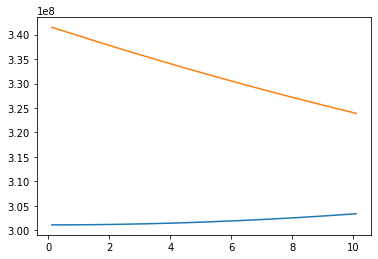

In [219]:
import matplotlib.pyplot as plt
plt.plot(w,tr)
plt.plot(w,ts)

In [245]:
z = []
p = 20
for i in range(0,1000,1):
    p = p + 0.01
    p = round(p,2)
    z.append(p)

In [246]:
for i in z:
    from sklearn.linear_model import Lasso
    rr = Lasso(alpha = i)
    model = rr.fit(xtrain,ytrain)

    pred_tr = model.predict(xtrain)
    tr_err = round(mean_squared_error(ytrain,pred_tr),2)

    pred_ts = model.predict(xtest)
    ts_err = round(mean_squared_error(ytest,pred_ts),2)

    print("==========",i,"===========")
    print(tr_err)
    print(ts_err)
    print(tr_err - ts_err)

========== 20.01 ===========
309080600.26
312263946.76
-3183346.5
========== 20.02 ===========
309088100.88
312254518.3
-3166417.4200000167
========== 20.03 ===========
309095605.24
312245094.14
-3149488.899999976
========== 20.04 ===========
309103113.36
312235674.28
-3132560.919999957
========== 20.05 ===========
309110625.22
312226258.71
-3115633.48999995
========== 20.06 ===========
309118140.83
312216847.43
-3098706.600000024
========== 20.07 ===========
309125660.18
312207440.46
-3081780.2799999714
========== 20.08 ===========
309133183.29
312198037.77
-3064854.4799999595
========== 20.09 ===========
309140710.14
312188639.39
-3047929.25
========== 20.1 ===========
309148240.74
312179245.31
-3031004.569999993
========== 20.11 ===========
309155775.09
312169855.52
-3014080.430000007
========== 20.12 ===========
309163313.18
312160470.03
-2997156.8499999642
========== 20.13 ===========
309170855.02
312151088.86
-2980233.8400000334
========== 20.14 ===========
309178400.61
312141711

========== 21.14 ===========
309951883.8
311225716.46
-1273832.6599999666
========== 21.15 ===========
309959807.88
311216773.52
-1256965.6399999857
========== 21.16 ===========
309967735.7
311207834.88
-1240099.1800000072
========== 21.17 ===========
309975667.26
311198900.53
-1223233.269999981
========== 21.18 ===========
309983602.58
311189970.49
-1206367.9100000262
========== 21.19 ===========
309991541.64
311181044.76
-1189503.1200000048
========== 21.2 ===========
309999484.45
311172123.33
-1172638.8799999952
========== 21.21 ===========
310007431.0
311163206.25
-1155775.25
========== 21.22 ===========
310015381.3
311154293.46
-1138912.1599999666
========== 21.23 ===========
310023335.35
311145384.98
-1122049.6299999952
========== 21.24 ===========
310031293.15
311136480.79
-1105187.6400000453
========== 21.25 ===========
310039254.69
311127580.9
-1088326.2099999785
========== 21.26 ===========
310047219.98
311118685.31
-1071465.3299999833
========== 21.27 ===========
310055189.0

========== 22.3 ===========
310873190.74
310255365.07
617825.6700000167
========== 22.31 ===========
310880845.46
310248087.28
632758.1800000072
========== 22.32 ===========
310888503.61
310240813.52
647690.0900000334
========== 22.33 ===========
310896165.19
310233543.79
662621.3999999762
========== 22.34 ===========
310903830.21
310226278.08
677552.1299999952
========== 22.35 ===========
310911498.65
310219016.4
692482.25
========== 22.36 ===========
310919170.52
310211758.77
707411.75
========== 22.37 ===========
310926845.81
310204505.18
722340.6299999952
========== 22.38 ===========
310934524.53
310197255.62
737268.9099999666
========== 22.39 ===========
310942206.68
310190010.1
752196.5799999833
========== 22.4 ===========
310949892.27
310182768.59
767123.6800000072
========== 22.41 ===========
310957581.28
310175531.07
782050.2099999785
========== 22.42 ===========
310965273.72
310168297.57
796976.1500000358
========== 22.43 ===========
310972969.59
310161068.12
811901.469999969

========== 23.45 ===========
311722597.51
309426331.62
2296265.8899999857
========== 23.46 ===========
311729339.23
309419573.1
2309766.129999995
========== 23.47 ===========
311736083.83
309412817.75
2323266.0799999833
========== 23.48 ===========
311742831.29
309406065.56
2336765.730000019
========== 23.49 ===========
311749581.63
309399316.55
2350265.0799999833
========== 23.5 ===========
311756334.85
309392570.71
2363764.1400000453
========== 23.51 ===========
311763090.94
309385828.04
2377262.899999976
========== 23.52 ===========
311769849.9
309379088.54
2390761.3599999547
========== 23.53 ===========
311776611.74
309372352.2
2404259.5400000215
========== 23.54 ===========
311783376.46
309365619.04
2417757.419999957
========== 23.55 ===========
311790144.04
309358889.04
2431255.0
========== 23.56 ===========
311796914.5
309352162.22
2444752.2799999714
========== 23.57 ===========
311803687.84
309345438.56
2458249.2799999714
========== 23.58 ===========
311810464.06
309338718.08
2

========== 24.63 ===========
312496245.07
308820706.62
3675538.449999988
========== 24.64 ===========
312502842.45
308816212.8
3686629.649999976
========== 24.65 ===========
312509442.51
308811721.2
3697721.3100000024
========== 24.66 ===========
312516045.24
308807231.83
3708813.410000026
========== 24.67 ===========
312522650.66
308802744.67
3719905.9900000095
========== 24.68 ===========
312529258.75
308798259.74
3730999.0099999905
========== 24.69 ===========
312535869.52
308793777.05
3742092.469999969
========== 24.7 ===========
312542482.97
308789296.58
3753186.3900000453
========== 24.71 ===========
312549099.09
308784818.33
3764280.7599999905
========== 24.72 ===========
312555717.9
308780342.31
3775375.589999974
========== 24.73 ===========
312562339.38
308775868.51
3786470.870000005
========== 24.74 ===========
312568963.54
308771396.94
3797566.600000024
========== 24.75 ===========
312575590.37
308766927.59
3808662.780000031
========== 24.76 ===========
312582219.89
30876246

========== 25.82 ===========
313300134.86
308301567.83
4998567.030000031
========== 25.83 ===========
313307050.92
308297338.68
5009712.24000001
========== 25.84 ===========
313313969.66
308293111.76
5020857.900000036
========== 25.85 ===========
313320891.07
308288887.06
5032004.00999999
========== 25.86 ===========
313327815.17
308284664.59
5043150.580000043
========== 25.87 ===========
313334741.94
308280444.34
5054297.600000024
========== 25.88 ===========
313341671.39
308276226.32
5065445.069999993
========== 25.89 ===========
313348603.52
308272010.52
5076593.0
========== 25.9 ===========
313355538.33
308267796.94
5087741.389999986
========== 25.91 ===========
313362475.81
308263585.59
5098890.220000029
========== 25.92 ===========
313369415.98
308259376.47
5110039.50999999
========== 25.93 ===========
313376358.82
308255169.57
5121189.25
========== 25.94 ===========
313383304.34
308250964.89
5132339.449999988
========== 25.95 ===========
313390252.54
308246762.44
5143490.1000000

314120259.82
307825822.8
6294437.019999981
========== 26.99 ===========
314127486.52
307821851.69
6305634.829999983
========== 27.0 ===========
314134715.9
307817882.81
6316833.089999974
========== 27.01 ===========
314141947.95
307813916.15
6328031.800000012
========== 27.02 ===========
314149182.68
307809951.72
6339230.959999979
========== 27.03 ===========
314156420.09
307805989.51
6350430.579999983
========== 27.04 ===========
314163660.18
307802029.53
6361630.650000036
========== 27.05 ===========
314170902.95
307798071.77
6372831.180000007
========== 27.06 ===========
314178148.39
307794116.24
6384032.149999976
========== 27.07 ===========
314185396.52
307790162.93
6395233.589999974
========== 27.08 ===========
314192647.32
307786211.86
6406435.459999979
========== 27.09 ===========
314199900.8
307782263.01
6417637.790000021
========== 27.1 ===========
314207156.96
307778316.38
6428840.579999983
========== 27.11 ===========
314214415.81
307774371.95
6440043.860000014
========== 2

========== 28.17 ===========
314999038.55
307368867.6
7630170.949999988
========== 28.18 ===========
315006583.92
307365161.03
7641422.890000045
========== 28.19 ===========
315014131.96
307361456.69
7652675.269999981
========== 28.2 ===========
315021682.68
307357754.58
7663928.100000024
========== 28.21 ===========
315029236.08
307354054.69
7675181.389999986
========== 28.22 ===========
315036792.16
307350357.02
7686435.140000045
========== 28.23 ===========
315044350.91
307346661.57
7697689.340000033
========== 28.24 ===========
315051912.34
307342968.35
7708943.98999995
========== 28.25 ===========
315059476.46
307339277.36
7720199.099999964
========== 28.26 ===========
315067043.25
307335588.59
7731454.660000026
========== 28.27 ===========
315074612.71
307331902.04
7742710.669999957
========== 28.28 ===========
315082184.86
307328217.72
7753967.139999986
========== 28.29 ===========
315089759.68
307324535.62
7765224.060000002
========== 28.3 ===========
315097337.18
307320855.75


========== 29.34 ===========
315896084.3
306965624.32
8930459.98000002
========== 29.35 ===========
315903874.91
306962445.43
8941429.48000002
========== 29.36 ===========
315911668.17
306959268.8
8952399.370000005
========== 29.37 ===========
315919464.09
306956094.41
8963369.679999948
========== 29.38 ===========
315927262.66
306952922.28
8974340.380000055
========== 29.39 ===========
315935063.89
306949752.39
8985311.5
========== 29.4 ===========
315942867.77
306946584.75
8996283.01999998
========== 29.41 ===========
315950674.31
306943419.35
9007254.959999979
========== 29.42 ===========
315958483.5
306940256.19
9018227.310000002
========== 29.43 ===========
315966295.34
306937095.27
9029200.069999993
========== 29.44 ===========
315974109.84
306933936.61
9040173.22999996
========== 29.45 ===========
315981926.99
306930780.19
9051146.800000012
========== 29.46 ===========
315989746.8
306927626.02
9062120.780000031
========== 29.47 ===========
315997569.26
306924474.1
9073095.159999

In [254]:
    from sklearn.linear_model import Lasso
    rr = Lasso(alpha = 21.9)
    model = rr.fit(xtrain,ytrain)

    pred_tr = model.predict(xtrain)
    tr_err = round(mean_squared_error(ytrain,pred_tr),2)

    pred_ts = model.predict(xtest)
    ts_err = round(mean_squared_error(ytest,pred_ts),2)

    print("==========",i,"===========")
    print(tr_err)
    print(ts_err)
    print(tr_err - ts_err)

========== 30.0 ===========
310564792.39
310558310.96
6481.430000007153


In [223]:
Xnew

,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,GrLivArea,Fireplaces,GarageYrBlt,...,GarageCond_No_Garage,GarageCond_Po,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_No_Pool,SaleType_Oth,SaleCondition_Abnorml,SaleCondition_Family,SaleCondition_Partial
0,-0.133126,0.651479,1.050994,0.878668,0.575425,-0.459303,1.161852,0.370333,-0.951226,1.021157,...,0,0,0,0,1,1,0,0,0,0
1,0.114333,-0.071836,0.156734,-0.429577,1.171992,0.466465,-0.795163,-0.482512,0.600495,-0.104483,...,0,0,0,0,1,1,0,0,0,0
2,0.419790,0.651479,0.984752,0.830215,0.092907,-0.313369,1.189351,0.515013,0.600495,0.937776,...,0,0,0,0,1,1,0,0,0,0
3,0.102733,0.651479,-1.863632,-0.720298,-0.499274,-0.687324,0.937276,0.383659,0.600495,0.812705,...,0,0,0,0,1,1,0,1,0,0
4,0.877975,1.374795,0.951632,0.733308,0.463568,0.199680,1.617877,1.299326,0.600495,0.896086,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-0.363185,0.651479,1.084115,0.975575,-0.073781,0.372976,-0.795163,-0.560562,-0.951226,1.062847,...,0,0,0,0,1,1,0,0,0,0
1455,-0.258788,-0.071836,0.918511,0.733308,-0.973018,-0.238122,0.795198,0.250402,0.600495,0.854395,...,0,0,0,0,1,1,0,0,0,0
1456,0.725247,-0.071836,0.222975,0.151865,0.759659,1.104925,-0.795163,1.061367,2.152216,-0.021102,...,0,0,0,0,1,1,0,0,0,0
1457,-0.001663,0.651479,-1.002492,1.024029,-0.369871,0.215641,1.844744,1.569647,2.152216,-1.563645,...,0,0,0,0,1,1,0,0,0,0


In [224]:
cols_to_keep = Xnew.columns

# Making Predctions on Testing Set

In [225]:
B.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,No_Alley_Access,Reg,Lvl,AllPub,...,120,0,No_Pool,MnPrv,None,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,No_Alley_Access,IR1,Lvl,AllPub,...,0,0,No_Pool,No_Fence,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,No_Alley_Access,IR1,Lvl,AllPub,...,0,0,No_Pool,MnPrv,None,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,No_Alley_Access,IR1,Lvl,AllPub,...,0,0,No_Pool,No_Fence,None,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,No_Alley_Access,IR1,HLS,AllPub,...,144,0,No_Pool,No_Fence,None,0,1,2010,WD,Normal


In [226]:
XB = B.drop(labels=["Id"],axis=1)

In [227]:
catB = []
conB = []
for i in XB.columns:
    if(XB[i].dtypes == "object"):
        catB.append(i)
        x = XB[i].mode()[0]
        XB[i] = XB[i].fillna(x)
    else:
        conB.append(i)
        x = XB[i].mean()
        XB[i] = XB[i].fillna(x)
        
            

In [228]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
XB1 = pd.DataFrame(ss.fit_transform(XB[conB]),columns=conB)

In [229]:
XB2 = pd.get_dummies(XB[catB])

In [230]:
XnewB = XB1.join(XB2) 

In [231]:
XnewB 

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.874711,0.555587,0.363929,-0.751101,0.400766,-0.340945,-1.072885,-0.570108,0.063295,0.517348,...,0,0,0,1,0,0,0,0,1,0
1,-0.874711,0.604239,0.897861,-0.054877,0.400766,-0.439695,-1.214908,0.041273,1.063392,-0.297903,...,0,0,0,1,0,0,0,0,1,0
2,0.061351,0.263676,0.809646,-0.751101,-0.497418,0.844059,0.678742,-0.570108,0.773254,-0.297903,...,0,0,0,1,0,0,0,0,1,0
3,0.061351,0.458284,0.032064,-0.054877,0.400766,0.876976,0.678742,-0.456889,0.357829,-0.297903,...,0,0,0,1,0,0,0,0,1,0
4,1.465443,-1.244533,-0.971808,1.337571,-0.497418,0.679475,0.394694,-0.570108,-0.387298,-0.297903,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2.401505,-2.314875,-1.591330,-1.447325,1.298950,-0.044694,-0.646813,-0.570108,-0.965376,-0.297903,...,0,0,0,1,0,0,0,0,1,0
1455,2.401505,-2.314875,-1.599808,-1.447325,-0.497418,-0.044694,-0.646813,-0.570108,-0.411477,-0.297903,...,0,0,0,1,1,0,0,0,0,0
1456,-0.874711,4.447740,2.055150,-0.751101,1.298950,-0.373861,0.584059,-0.570108,1.724994,-0.297903,...,0,0,0,1,1,0,0,0,0,0
1457,0.646389,-0.320147,0.125527,-0.751101,-0.497418,0.679475,0.394694,-0.570108,-0.224645,-0.297903,...,0,0,0,1,0,0,0,0,1,0


In [232]:
XnewB['Alley_N0_Alley_Access'] = 0
XnewB['HouseStyle_2.5Fin'] = 0
XnewB['RoofMatl_Membran'] = 0
XnewB['Exterior2nd_Other'] = 0
XnewB['Heating_OthW'] = 0 
XnewB['Electrical_Mix'] = 0

In [233]:
XnewB = XnewB[cols_to_keep]

In [234]:
XnewB

,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,TotalBsmtSF,2ndFlrSF,GrLivArea,Fireplaces,GarageYrBlt,...,GarageCond_No_Garage,GarageCond_Po,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_No_Pool,SaleType_Oth,SaleCondition_Abnorml,SaleCondition_Family,SaleCondition_Partial
0,0.363929,-0.751101,-0.340945,-1.072885,0.063295,-0.370808,-0.775254,-1.215588,-0.898055,-0.650488,...,0,0,0,0,1,1,0,0,0,0
1,0.897861,-0.054877,-0.439695,-1.214908,1.063392,0.639144,-0.775254,-0.323539,-0.898055,-0.767194,...,0,0,0,0,1,1,0,0,0,0
2,0.809646,-0.751101,0.844059,0.678742,0.773254,-0.266876,0.891944,0.294508,0.647066,0.749983,...,0,0,0,0,1,1,0,0,0,0
3,0.032064,-0.054877,0.876976,0.678742,0.357829,-0.271395,0.837243,0.243004,0.647066,0.788885,...,0,0,0,0,1,1,0,0,0,0
4,-0.971808,1.337571,0.679475,0.394694,-0.387298,0.528434,-0.775254,-0.424487,-0.898055,0.555473,...,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,-1.591330,-1.447325,-0.044694,-0.646813,-0.965376,-1.129968,0.523306,-0.811797,-0.898055,0.000000,...,1,0,0,0,1,1,0,0,0,0
1455,-1.599808,-1.447325,-0.044694,-0.646813,-0.411477,-1.129968,0.523306,-0.811797,-0.898055,-0.300371,...,0,0,0,0,1,1,0,1,0,0
1456,2.055150,-0.751101,-0.373861,0.584059,1.724994,0.401907,-0.775254,-0.539856,0.647066,-0.689390,...,0,0,0,0,1,1,0,1,0,0
1457,0.125527,-0.751101,0.679475,0.394694,-0.224645,-0.303026,-0.775254,-1.063136,-0.898055,0.000000,...,1,0,0,0,1,1,0,0,0,0


In [235]:
pred = model.predict(XnewB)

In [236]:
J = B[["Id"]]
J['SalePrice'] = pred

In [237]:
J

,Id,SalePrice
0,1461,120964.465015
1,1462,170853.948424
2,1463,197067.799371
3,1464,202926.867271
4,1465,207753.878689
...,...,...
1454,2915,78111.630976
1455,2916,95512.640121
1456,2917,188630.734332
1457,2918,129560.637944


In [238]:
J.to_csv("C:/Users/jagdi/Documents/jagdish_Housing_Sol.csv")